In [67]:
import yfinance as yf

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")



In [68]:
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,441.790009,444.600006,438.910004,442.940002,15808800,0.0,0.0
2024-07-23 00:00:00-04:00,443.899994,448.390015,443.100006,444.850006,13107100,0.0,0.0
2024-07-24 00:00:00-04:00,440.450012,441.480011,427.589996,428.899994,26805800,0.0,0.0


<Axes: xlabel='Date'>

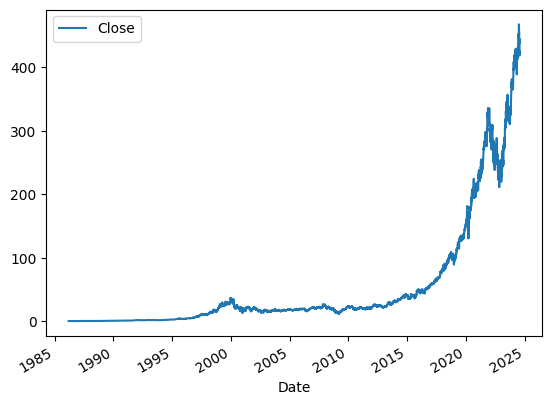

In [71]:
msft_hist.plot.line(y="Close",use_index=True)

In [72]:
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual Close'})
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data["Target"].value_counts()

Target
1.0    4894
0.0    4775
Name: count, dtype: int64

In [73]:
data.head(5)

,Actual Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060055,NaN
1986-03-14 00:00:00-05:00,0.062199,1.0
1986-03-17 00:00:00-05:00,0.063272,1.0
1986-03-18 00:00:00-05:00,0.061663,0.0
1986-03-19 00:00:00-05:00,0.060591,0.0


In [74]:
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)


In [75]:
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,6.776640e+07,0.0,0.0


In [76]:
predictors = ["Close","High","Low","Open","Volume"] #Day before
data = data.join(msft_prev[predictors]).iloc[1:]
data

,Actual Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062199,1.0,0.060055,0.062736,0.054693,0.054693,1.031789e+09
1986-03-17 00:00:00-05:00,0.063272,1.0,0.062199,0.063272,0.060055,0.060055,3.081600e+08
1986-03-18 00:00:00-05:00,0.061663,0.0,0.063272,0.063808,0.062199,0.062199,1.331712e+08
1986-03-19 00:00:00-05:00,0.060591,0.0,0.061663,0.063808,0.061127,0.063272,6.776640e+07
1986-03-20 00:00:00-05:00,0.058982,0.0,0.060591,0.062199,0.060055,0.061663,4.789440e+07
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,442.940002,1.0,437.109985,441.140015,432.000000,433.100006,2.094040e+07
2024-07-23 00:00:00-04:00,444.850006,1.0,442.940002,444.600006,438.910004,441.790009,1.580880e+07
2024-07-24 00:00:00-04:00,428.899994,0.0,444.850006,448.390015,443.100006,443.899994,1.310710e+07


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [79]:
from sklearn.metrics import precision_score
import pandas as pd
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
preds

Date
2024-03-05 00:00:00-05:00    0.0
2024-03-06 00:00:00-05:00    0.0
2024-03-07 00:00:00-05:00    1.0
2024-03-08 00:00:00-05:00    1.0
2024-03-11 00:00:00-04:00    0.0
                            ... 
2024-07-22 00:00:00-04:00    0.0
2024-07-23 00:00:00-04:00    0.0
2024-07-24 00:00:00-04:00    0.0
2024-07-25 00:00:00-04:00    0.0
2024-07-26 00:00:00-04:00    0.0
Length: 100, dtype: float64

In [80]:
precision_score(test["Target"], preds)

0.8333333333333334

In [81]:
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
combined

,Target,Predictions
Date,,
2024-03-05 00:00:00-05:00,0.0,0.0
2024-03-06 00:00:00-05:00,0.0,0.0
2024-03-07 00:00:00-05:00,1.0,1.0
2024-03-08 00:00:00-05:00,0.0,1.0
2024-03-11 00:00:00-04:00,0.0,0.0
...,...,...
2024-07-22 00:00:00-04:00,1.0,0.0
2024-07-23 00:00:00-04:00,1.0,0.0
2024-07-24 00:00:00-04:00,0.0,0.0


<Axes: xlabel='Date'>

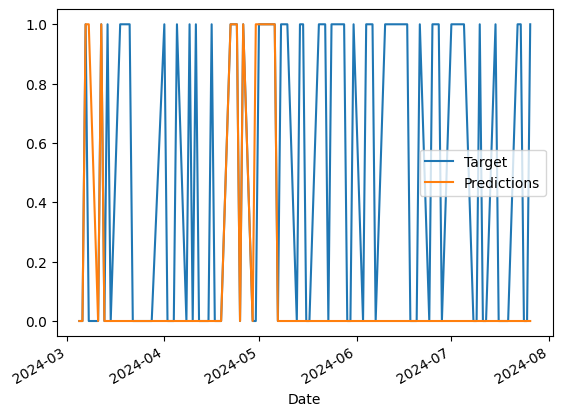

In [82]:
combined.plot()

In [83]:
start = 1000
step = 750
i=1000
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the random forest model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)


In [89]:
predictions = backtest(data, model, predictors)
predictions["Predictions"].value_counts()

Predictions
0.0    7944
1.0     725
Name: count, dtype: int64

In [90]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5103448275862069

In [91]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()["Target"]






In [92]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]


In [93]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)


In [94]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5955414012738853

In [95]:
predictions["Predictions"].value_counts()

Predictions
0.0    7990
1.0     314
Name: count, dtype: int64

<Axes: xlabel='Date'>

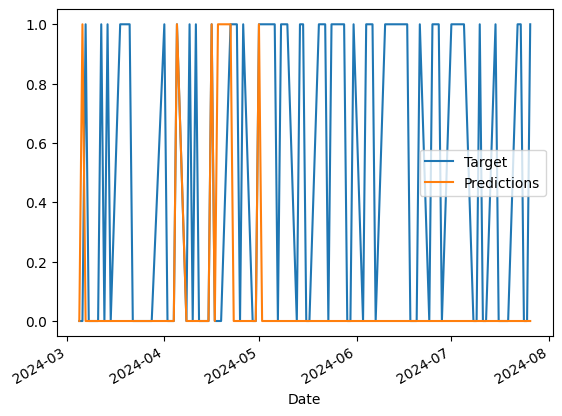

In [96]:
predictions.iloc[-100:].plot()